In [ ]:
import numpy as np 
from skimage import io, color, exposure
import matplotlib.pyplot as plt 

In [ ]:
I = io.imread("land.jpeg")
print(I.shape)

(683, 1024)


(-0.5, 1023.5, 682.5, -0.5)

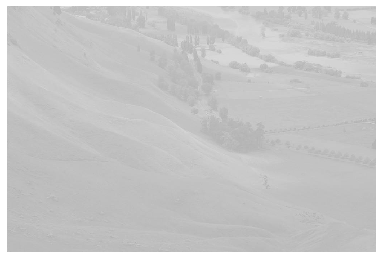

In [ ]:
io.imshow(I)
plt.axis("off")

# Plotting Histogram

In [ ]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    
    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

In [ ]:
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")
    
    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

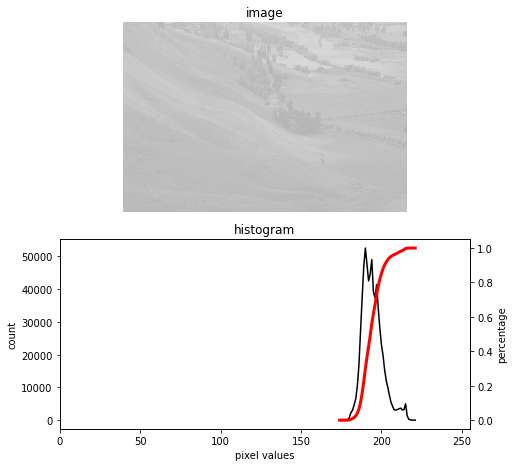

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)
plt.show()

## Histogram of Color Image

In [ ]:
I = io.imread("good.jpeg")
print(I.shape)

(756, 1008, 3)


(-0.5, 1007.5, 755.5, -0.5)

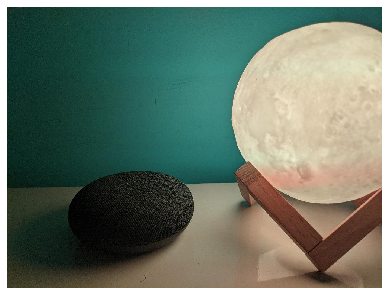

In [ ]:
io.imshow(I)
plt.axis("off")

In [ ]:
def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])
        
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

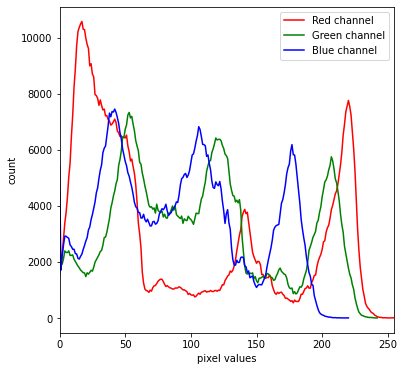

In [ ]:
plot_hist_color(I)
plt.show()

Text(0.5, 1.0, 'Blue')

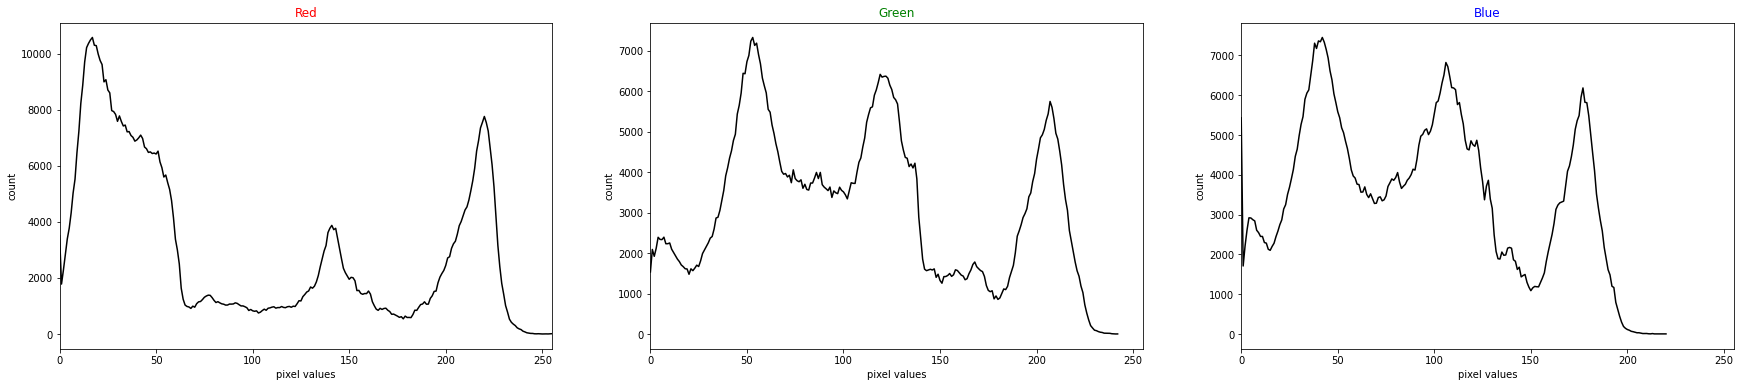

In [ ]:
plt.rcParams['figure.figsize'] = (30, 6)
plt.subplot(1, 3, 1)
plot_hist(I[:, :, 0], plot_cdf=False)
plt.title("Red", color="red")

plt.subplot(1, 3, 2)
plot_hist(I[:, :, 1], plot_cdf=False)
plt.title("Green", color="green")

plt.subplot(1, 3, 3)
plot_hist(I[:, :, 2], plot_cdf=False)
plt.title("Blue", color="blue")

# Histogram Equalization

In [ ]:
I = io.imread("land.jpeg")
I = I/255
print(I.shape)

(683, 1024)


In [ ]:
Ieq = exposure.equalize_hist(I)

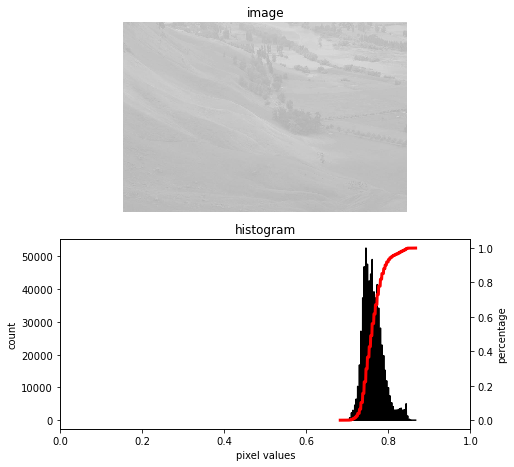

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)

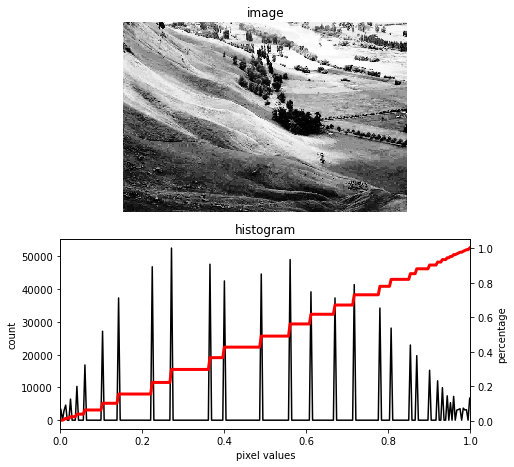

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(Ieq)

In [ ]:
I = io.imread("tsukuba_l.png")
I = I/255

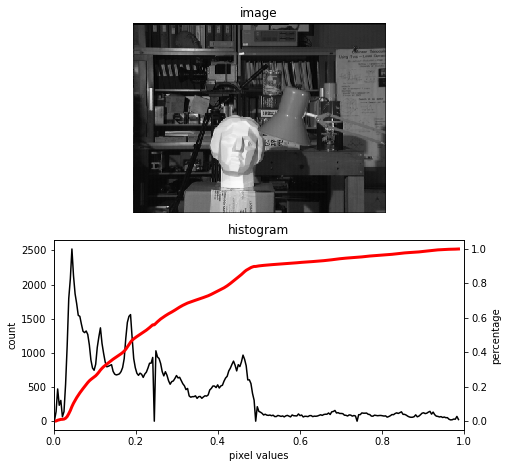

In [ ]:
plot_img_and_hist(I)

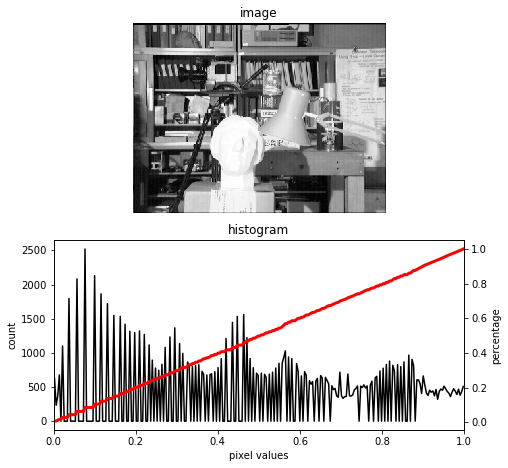

In [ ]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

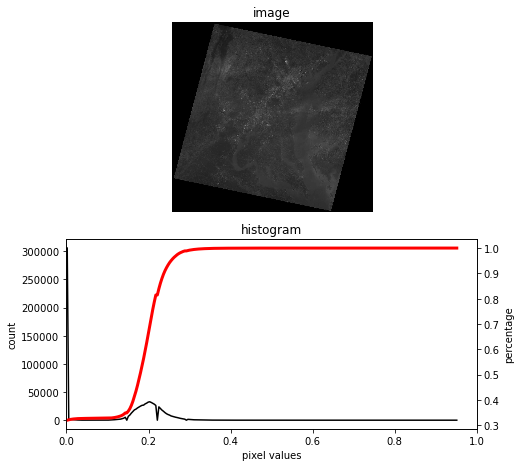

In [ ]:
I = io.imread("landsat_down.jpeg")
I = I/255
plot_img_and_hist(I, plot_cdf=True)

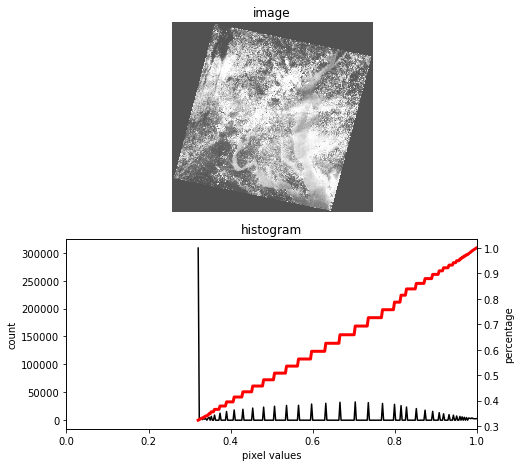

In [ ]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

In [ ]:
I = io.imread("good.jpeg")
I = I/255

In [ ]:
Ieq = I.copy()
Ieq[:, :, 0] = exposure.equalize_hist(I[:, :, 0])
Ieq[:, :, 1] = exposure.equalize_hist(I[:, :, 1])
Ieq[:, :, 2] = exposure.equalize_hist(I[:, :, 2])

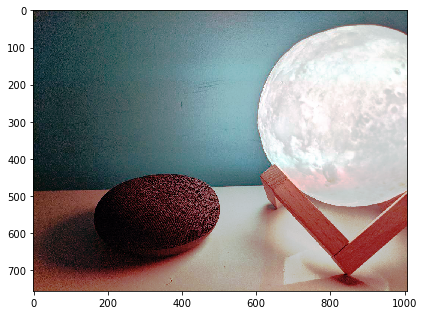

In [ ]:
io.imshow(Ieq)

In [ ]:
Ilab = color.rgb2lab(I)

In [ ]:
print(I.shape)
print(Ilab.shape)

(756, 1008, 3)
(756, 1008, 3)


In [ ]:
print(Ilab[:, :, 0].min())
print(Ilab[:, :, 0].max())

0.0
95.86054755805809


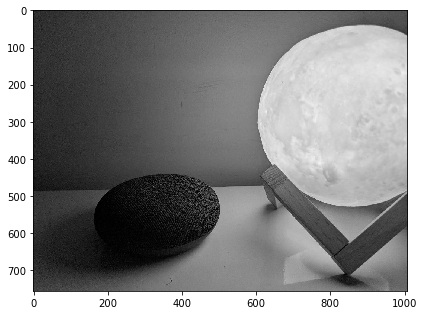

In [ ]:
io.imshow(Ilab[:, :, 0]/100)

In [ ]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

In [ ]:
Ieq = exposure.equalize_hist(Ilab[:, :, 0])

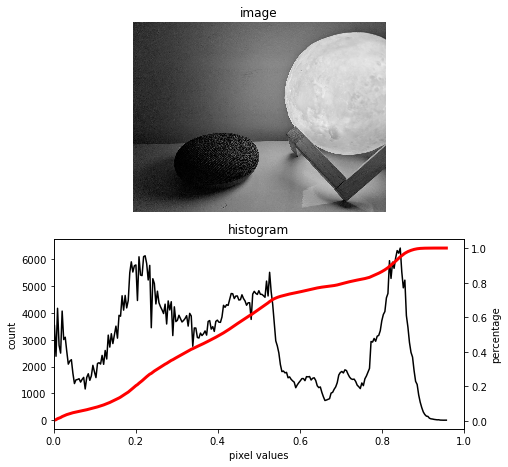

In [ ]:
plot_img_and_hist(Ilab[:, :, 0])

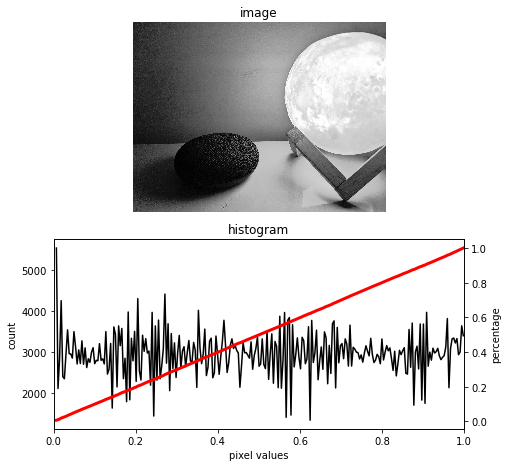

In [ ]:
plot_img_and_hist(Ieq)

In [ ]:
Ilab[:, :, 0] = Ieq*100

In [ ]:
Irecon = color.lab2rgb(Ilab)

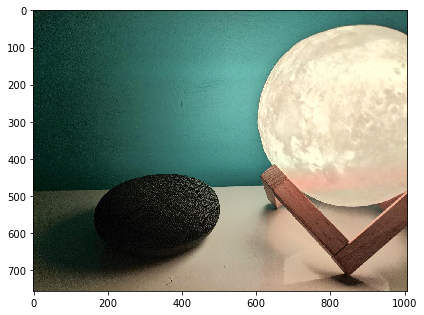

In [ ]:
io.imshow(Irecon)

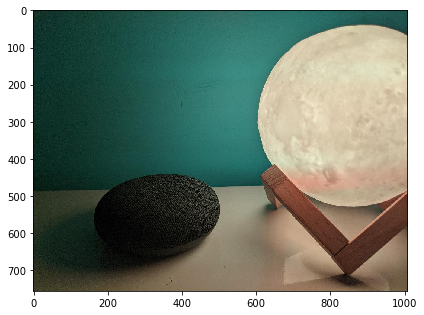

In [ ]:
io.imshow(I)

# Degrading and Image

In [ ]:
I = io.imread("tsukuba_l.png")
I = I/255

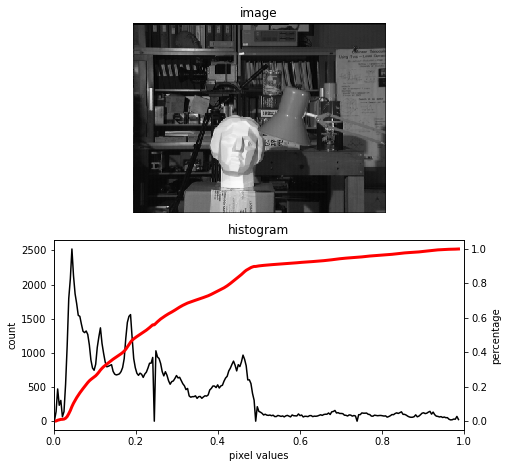

In [ ]:
plot_img_and_hist(I)

In [ ]:
Idegraded = exposure.rescale_intensity(I, in_range=(0, 1), out_range=(0.2, 0.4))

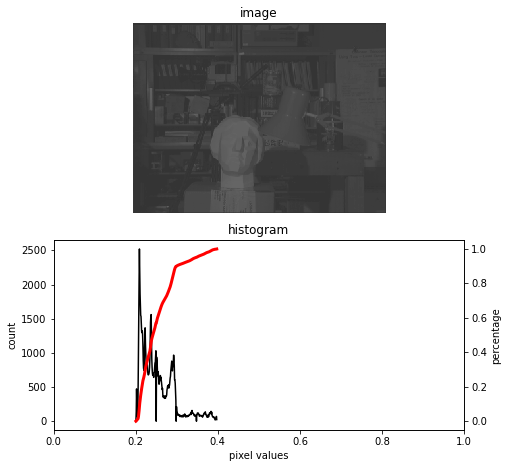

In [ ]:
plot_img_and_hist(Idegraded)

In [ ]:
Ieq_degraded = exposure.equalize_hist(Idegraded)


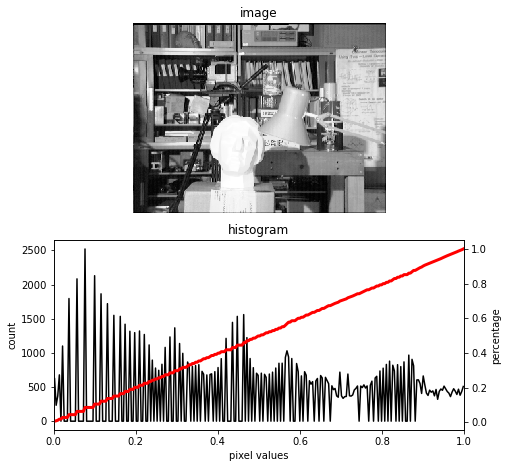

In [ ]:
plot_img_and_hist(Ieq_degraded)

## Degrading color image

In [ ]:
I = io.imread("good.jpeg")
I = I/255

In [ ]:
Ilab = color.rgb2lab(I)

In [ ]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

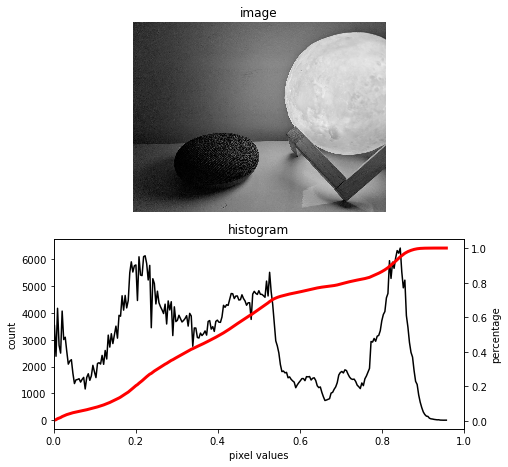

In [ ]:
plot_img_and_hist(Ilab[:, :, 0])

In [ ]:
Idegraded_l = exposure.rescale_intensity(Ilab[:, :, 0], in_range=(0, 1), out_range=(0.4, 0.6))

In [ ]:
Ilab[:, :, 0] = Idegraded_l*100

In [ ]:
Idegraded = color.lab2rgb(Ilab)

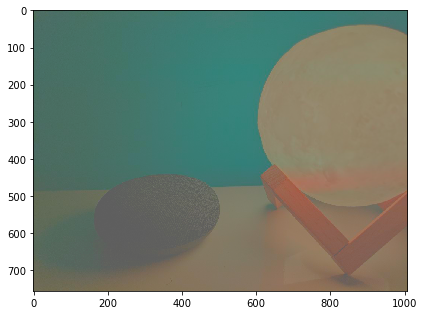

In [ ]:
io.imshow(Idegraded)

# Adaptive Histogram Equalization

In [ ]:
I = io.imread("tsukuba_l.png")
I = I/255

In [ ]:
I_adapt_eq = exposure.equalize_adapthist(I, kernel_size=(36, 36), clip_limit=0)

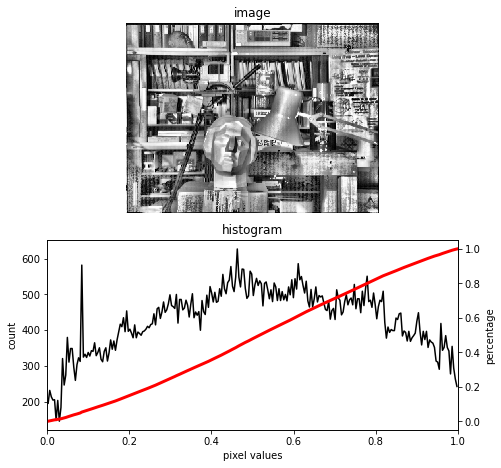

In [ ]:
plot_img_and_hist(I_adapt_eq)

In [ ]:
I = io.imread("HalfMoon.jpeg")
I = I/255
I = color.rgb2gray(I)
print(I.shape)

(1024, 714)


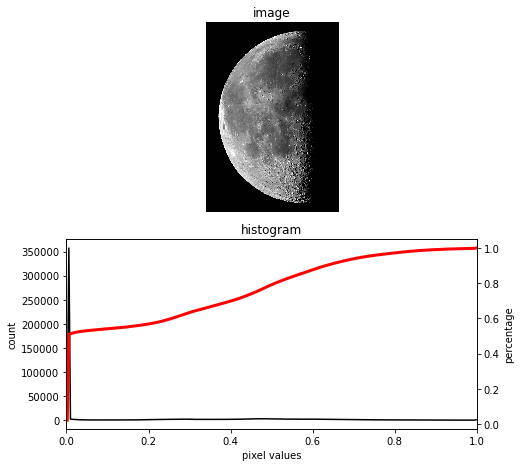

In [ ]:
plot_img_and_hist(I)

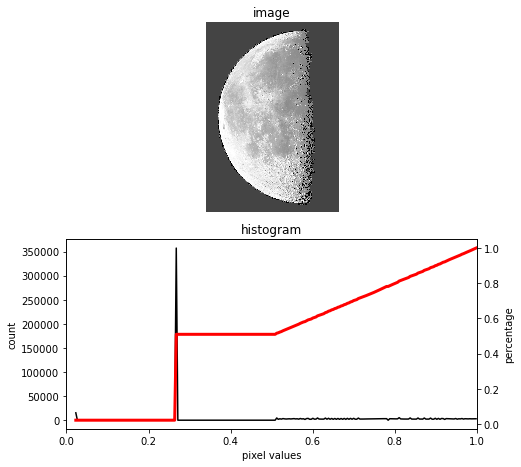

In [ ]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

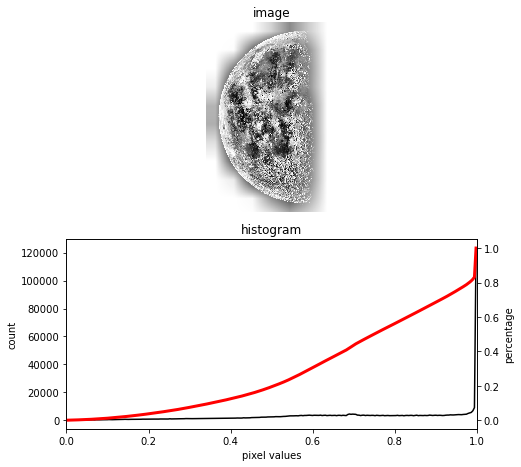

In [ ]:
I_AHE = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0)
plot_img_and_hist(I_AHE)

# CLAHE

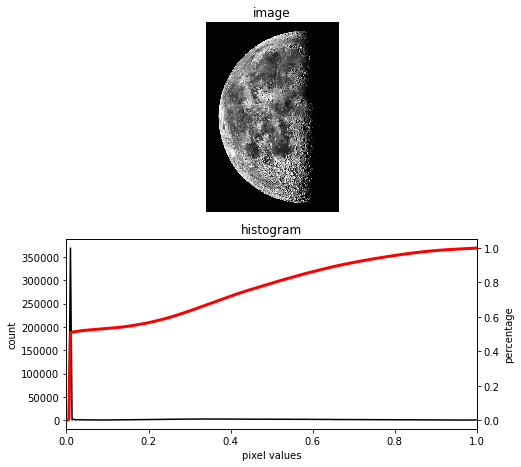

In [ ]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0.01)
plot_img_and_hist(I_CLAHE)

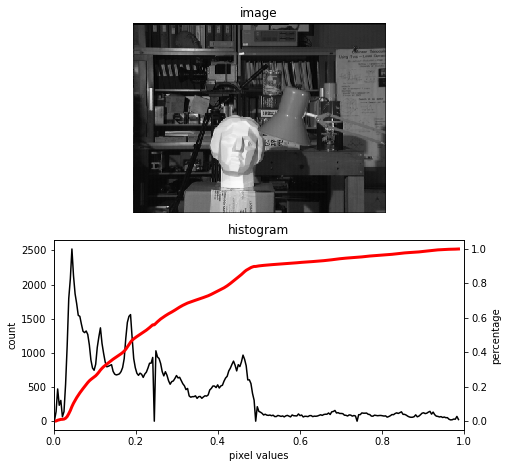

In [ ]:
I = io.imread("tsukuba_l.png")
I = I/255
plot_img_and_hist(I)

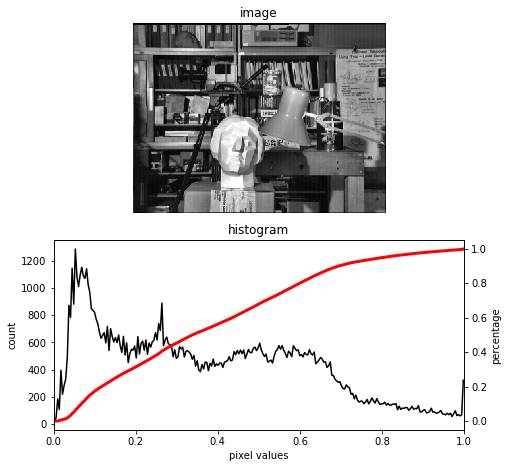

In [ ]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size=(36, 36), clip_limit=0.01)
plot_img_and_hist(I_CLAHE)